## Shortest Path Algorithm

<IPython.core.display.Javascript object>

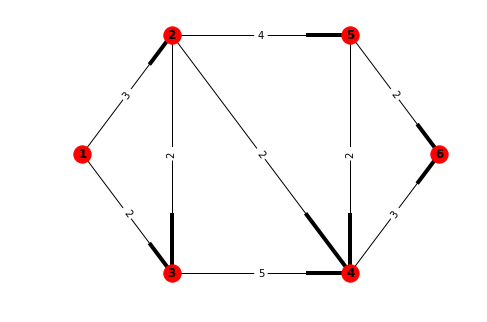

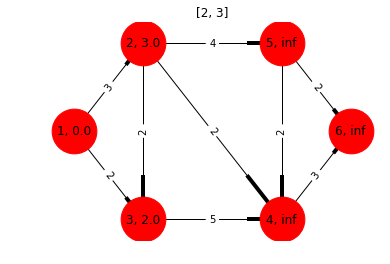

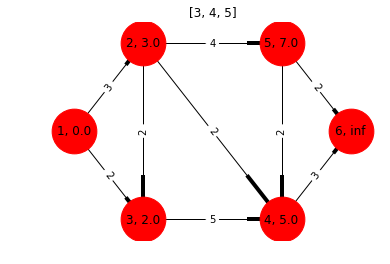

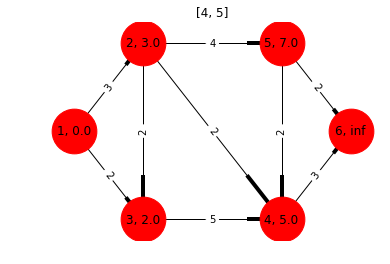

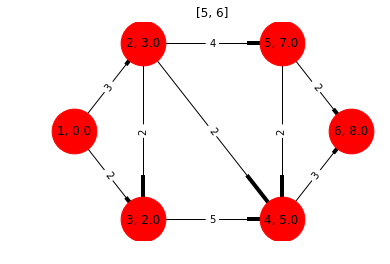

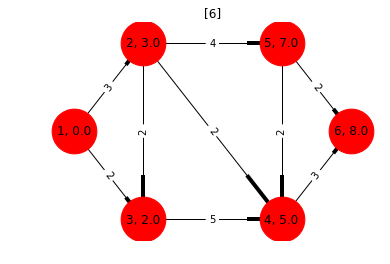

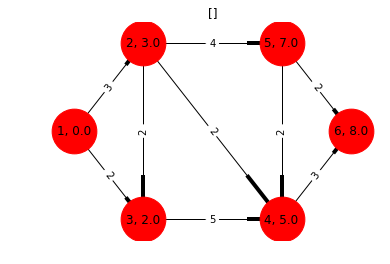

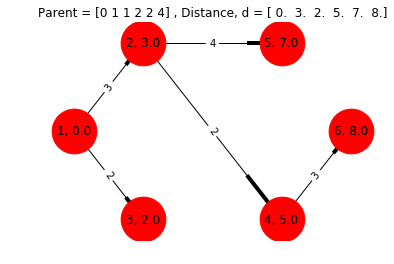

In [20]:
from IPython.display import display, Javascript

disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import bsr_matrix, csr_matrix

def adjacency_list(FStar):
    '''
    Outarc adjacency list
    '''
    A = dict()
    # Excludes the dummy node 0.
    N = np.sort(np.unique(FStar[:,0:2].reshape(-1,)))[1:]
    for i in N:
        A[i] = FStar[:,1][np.argwhere(FStar[:,0]==i)].reshape(-1,).tolist()
    return A

def FIFO_ShortestPath(FStar, s, d=None):
    '''
    FIFO Shortest Path Algorithm
    '''
    A = adjacency_list(FStar)
    n = len(A)
    NODELIST = list([s])
    if d is None:
        d = np.ndarray((n+1,))
        d[:] = np.inf
        d[s] = 0
    parent = np.zeros(n+1, dtype=int)
    parent[s] = 0
    while len(NODELIST) != 0:
        i = NODELIST.pop(0) #Removes the first element
        for j in A[i]:
            c = FStar[np.all(FStar[:,0:2]==[i,j], axis=1),2]
            if d[j] > d[i] + c:
                d[j] = d[i] + c
                parent[j] = i
                if j not in NODELIST:
                    NODELIST.append(j)
        # Drawing each pass
        G = nx.DiGraph()
        G.add_nodes_from([1,2,3,4,5,6])
        G.add_weighted_edges_from([(1,2, 3),(1,3, 2),(2,3,2),(2,4,2),(2,5,4),(3,4,5),(4,6,3),(5,4,2),(5,6,2)])
        shells=[[6,5,2,1,3,4]]
        pos = nx.shell_layout(G, shells)
        plt.title(str(NODELIST))
        nx.draw(G,pos=pos, with_labels=False, font_weight='bold', node_size=2000)
        labels = nx.get_edge_attributes(G,'weight')
        nx.draw_networkx_edge_labels(G,pos=pos,edge_labels=labels)
        offset =0.2
        #for p in pos:  # raise text positions
        #    pos[p][1] += offset
        nx.draw_networkx_labels(G, pos, labels={l:"%d, %s"%(l,d[l]) for l in range(1,7)})
        plt.show()
    return parent, d

# Forward star representation [T, H, C, U]
# [0, 0, 0] is a dummy node.
FStar = np.array([[0, 0, 0],
                    [1, 2, 3],
                    [1, 3, 2],
                    [2, 3, 2],
                    [2, 4, 2],
                    [2, 5, 4],
                    [3, 4, 5],
                    [4, 6, 3],
                    [5, 4, 2],
                    [5, 6, 2],])
#Drawing the graph
G = nx.DiGraph()
G.add_nodes_from([1,2,3,4,5,6])
G.add_weighted_edges_from([(1,2, 3),(1,3, 2),(2,3,2),(2,4,2),(2,5,4),(3,4,5),(4,6,3),(5,4,2),(5,6,2)])
shells=[[6,5,2,1,3,4]]
pos = nx.shell_layout(G, shells)
nx.draw(G,pos=pos, with_labels=True, font_weight='bold')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos=pos,edge_labels=labels)
plt.show()

parent, d = FIFO_ShortestPath(FStar, 1)

#Draw the shortest path tree
G = nx.DiGraph()
G.add_nodes_from([1,2,3,4,5,6])
G.add_weighted_edges_from([(1,2, 3),(1,3, 2),(2,4,2),(2,5,4),(4,6,3)])
shells=[[6,5,2,1,3,4]]
pos = nx.shell_layout(G, shells)
plt.title("Parent = " + str(parent[1:]) + " , Distance, d = " + str(d[1:]))
nx.draw(G,pos=pos, with_labels=False, font_weight='bold', node_size=2000)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos=pos,edge_labels=labels)
nx.draw_networkx_labels(G, pos, labels={l:"%d, %s"%(l,d[l]) for l in range(1,7)})
plt.show()
